In [110]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [111]:
data=pd.read_excel('테스트용.xlsx')
data = data.drop(['Unnamed: 0'],axis=1)

In [ ]:
sns.distplot(feature["userscore"])

In [ ]:
sns.distplot(feature["metascore"])

In [ ]:
feature = data[['metascore', 'userscore']]
feature

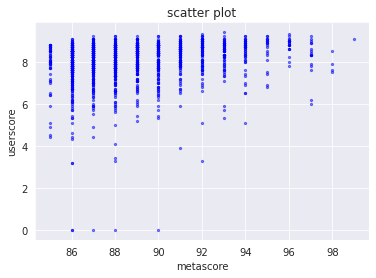

In [112]:
feature.plot.scatter(x='metascore',
                     y='userscore',
                     s=5, 
                     c='blue',
                     alpha=0.5)
plt.title("scatter plot")
plt.xlabel("metascore")
plt.ylabel("userscore")
plt.show()

In [119]:
model = KMeans(n_clusters=12)
model.fit(feature)
predict = pd.DataFrame(model.predict(feature))
predict.columns=['predict']

In [120]:
r = pd.concat([feature, predict], axis=1)
print (r)

      metascore  userscore  predict
0            99        9.1       10
1            98        7.5       10
2            98        7.6       10
3            98        8.5       10
4            98        7.9       10
...         ...        ...      ...
1495         85        4.9       11
1496         85        7.1       11
1497         85        7.7        0
1498         85        8.0        0
1499         85        8.4        0

[1500 rows x 3 columns]


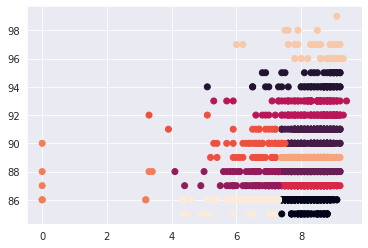

In [121]:
centers = pd.DataFrame(model.cluster_centers_, columns=['userscore', 'metascore'])
center_x = centers['userscore']
center_y = centers['metascore']

plt.scatter(r['userscore'],r['metascore'], c=r['predict'],alpha=1)
plt.show()

In [ ]:
def elbow(X):
  sse = []

  for i in range(1, 11):
    km =KMeans(n_clusters=i, init='k-means++', random_state=0)
    km.fit(X)
    sse.append(km.inertia_)

  plt.plot(range(1, 11), sse, marker = 'o')
  plt.xlabel('클러스터 개수')
  plt.ylabel('SSE')
  plt.show()
elbow(feature)